In [2]:
import os
import numpy as np
import scipy.io as sio
import seaborn as sns
import matplotlib.pyplot as plt
from utils import plot_sq

In [3]:
datapath="/Users/xli77/Dropbox (GaTech)/MISA/results/SIVA/fixedSubspace/um2mm/seed7_snr1000/"
subspace_struct_list=['234111','2222211','333111','441111','12x1']
num_iter=11
num_subspace_struct=len(subspace_struct_list)
isi_um=np.zeros((num_subspace_struct,num_subspace_struct,num_iter))
isi_ummm=np.zeros((num_subspace_struct,num_subspace_struct,num_iter))
isi_mm=np.zeros((num_subspace_struct,num_subspace_struct,num_iter))
aux_um=np.zeros((num_subspace_struct,num_subspace_struct,num_iter))
aux_ummm=np.zeros((num_subspace_struct,num_subspace_struct,num_iter))
aux_mm=np.zeros((num_subspace_struct,num_subspace_struct,num_iter))

for i,ss in enumerate(subspace_struct_list):
    if ss == '12x1':
        num_iter=1
    else:
        num_iter=11

    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","um.mat"))
    isi_um[i,i,:] = np.squeeze(data['isi_um'])
    if ss == '12x1':
        a = np.squeeze(data['aux_um'][2,:])
        aux_um[i,i,:] = a
    else:
        a = np.squeeze(data['aux_um'][1,:])
        aux_um[i,i,:] = np.array([a[k][0][0] for k in range(num_iter)])
    
    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","ummm.mat"))
    isi_ummm[i,i,:] = np.squeeze(data['isi_ummm'])
    if ss == '12x1':
        a = np.squeeze(data['aux_ummm'][2,:])
        aux_ummm[i,i,:] = a
    else:
        a = np.squeeze(data['aux_ummm'][1,:])
        aux_ummm[i,i,:] = np.array([a[k][0][0] for k in range(num_iter)])
    
    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","mm.mat"))
    isi_mm[i,i,:] = np.squeeze(data['isi_mm'])
    if ss == '12x1':
        a = np.squeeze(data['aux_mm'][2,:])
        aux_mm[i,i,:] = a
    else:
        a = np.squeeze(data['aux_mm'][1,:])
        aux_mm[i,i,:] = np.array([a[k][0][0] for k in range(num_iter)])
    
    incorrect_ss_list = list(range(num_subspace_struct))
    incorrect_ss_list.remove(i)
    for j in incorrect_ss_list:
        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}_incorrect{subspace_struct_list[j]}","um.mat"))
        isi_um[i,j,:] = np.squeeze(data['isi_um_s1'])
        if ss == '12x1' or subspace_struct_list[j] == '12x1':
            a = np.squeeze(data['aux_um_s1'][2,:])
            aux_um[i,j,:] = a
        else:
            a = np.squeeze(data['aux_um_s1'][1,:])
            aux_um[i,j,:] = np.array([a[k][0][0] for k in range(num_iter)])

        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}_incorrect{subspace_struct_list[j]}","ummm.mat"))
        isi_ummm[i,j,:] = np.squeeze(data['isi_ummm_s1'])
        if ss == '12x1' or subspace_struct_list[j] == '12x1':
            a = np.squeeze(data['aux_ummm_s1'][2,:])
            aux_ummm[i,j,:] = a
        else:
            a = np.squeeze(data['aux_ummm_s1'][1,:])
            aux_ummm[i,j,:] = np.array([a[k][0][0] for k in range(num_iter)])

        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}_incorrect{subspace_struct_list[j]}","mm.mat"))
        isi_mm[i,j,:] = np.squeeze(data['isi_mm_s1'])
        if ss == '12x1' or subspace_struct_list[j] == '12x1':
            a = np.squeeze(data['aux_mm_s1'][2,:])
            aux_mm[i,j,:] = a
        else:
            a = np.squeeze(data['aux_mm_s1'][1,:])
            aux_mm[i,j,:] = np.array([a[k][0][0] for k in range(num_iter)])

/var/folders/5j/0hyql0bn3xj4gszvbk8p05sr0000gq/T/ipykernel_55461/4142904257.py:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  aux_um[i,j,:] = a
/var/folders/5j/0hyql0bn3xj4gszvbk8p05sr0000gq/T/ipykernel_55461/4142904257.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  aux_ummm[i,j,:] = a
/var/folders/5j/0hyql0bn3xj4gszvbk8p05sr0000gq/T/ipykernel_55461/4142904257.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  aux_mm[i,j,:] = a
/var/folders/5j/0hyql0bn3x

In [4]:
isi_um_min = np.min(isi_um,axis=2)
isi_ummm_min = np.min(isi_ummm,axis=2)
isi_mm_min = np.min(isi_mm,axis=2)

isi_um_min_ind = np.argmin(isi_um,axis=2)
isi_ummm_min_ind = np.argmin(isi_ummm,axis=2)
isi_mm_min_ind = np.argmin(isi_mm,axis=2)

aux_um_min = np.min(aux_um,axis=2)
aux_ummm_min = np.min(aux_ummm,axis=2)
aux_mm_min = np.min(aux_mm,axis=2)

print(np.round(aux_um_min,3))
print(np.round(aux_ummm_min,3))
print(np.round(aux_mm_min,3))

aux_um_min_ind = np.argmin(aux_um,axis=2)
aux_ummm_min_ind = np.argmin(aux_ummm,axis=2)
aux_mm_min_ind = np.argmin(aux_mm,axis=2)

[[42.692 42.884 42.762 42.992 43.23 ]
 [42.649 42.3   42.851 42.868 42.918]
 [42.72  42.858 42.635 43.1   43.256]
 [43.091 43.239 43.174 42.976 43.507]
 [43.401 43.01  43.497 43.773 42.021]]
[[42.677 42.865 42.751 43.038 43.111]
 [42.656 42.229 42.628 42.764 42.749]
 [42.695 42.862 42.62  43.04  43.126]
 [42.689 42.397 41.12  39.937 33.609]
 [43.405 42.966 43.388 43.975 42.005]]
[[23.824 23.947 23.819 24.028 24.274]
 [27.766 27.442 27.803 28.162 28.182]
 [23.931 24.029 23.779 24.036 24.229]
 [17.265 18.66  17.29  17.564 19.731]
 [36.764 36.359 36.758 37.265 35.262]]


In [5]:
# use loss to grab ISI
isi_um_min_loss = np.zeros((num_subspace_struct,num_subspace_struct))
isi_ummm_min_loss = np.zeros((num_subspace_struct,num_subspace_struct))
isi_mm_min_loss = np.zeros((num_subspace_struct,num_subspace_struct))

for i in range(num_subspace_struct):
    for j in range(num_subspace_struct):
        isi_um_min_loss[i,j] = isi_um[i,j,aux_um_min_ind[i,j]]
        isi_ummm_min_loss[i,j] = isi_ummm[i,j,aux_ummm_min_ind[i,j]]
        isi_mm_min_loss[i,j] = isi_mm[i,j,aux_mm_min_ind[i,j]]

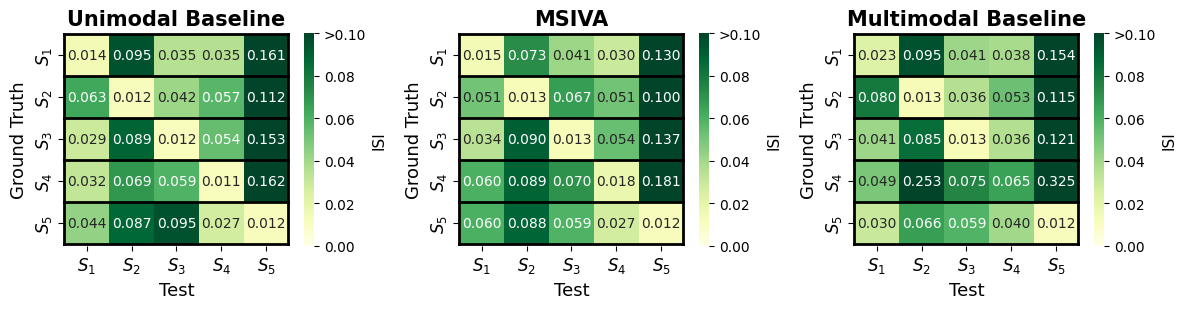

In [ ]:
label=["$S_1$","$S_2$","$S_3$","$S_4$","$S_5$"]
title_list=["Unimodal Baseline","MSIVA","Multimodal Baseline"]
isi_list=[isi_um_min_loss,isi_ummm_min_loss,isi_mm_min_loss]

delta = 0.025
fig,axes=plt.subplots(1,3,figsize=(12,3.2))

for i in range(3):
    heatmap = sns.heatmap(isi_list[i],cmap="YlGn",annot=True,fmt=".3f",vmin=0,vmax=0.1,xticklabels=label,yticklabels=label,ax=axes[i])
    axes[i].set_title(title_list[i],fontsize=15,fontweight='bold')
    axes[i].set_ylabel("Ground Truth",fontsize=13)
    axes[i].set_xlabel("Test",fontsize=13)
    axes[i].tick_params(axis='both', which='major', labelsize=12)
    for j in range(0,6):
        axes[i].axhline(y=j, xmin=0, xmax=5, color='k', linewidth=2)
    for j in [0,5]:
        axes[i].axvline(x=j, ymin=0, ymax=5, color='k', linewidth=2)
    axes[i].set_xlim(0-delta,5+delta)
    axes[i].set_ylim(5+delta*1.4,0-delta)
    cbar = heatmap.collections[0].colorbar
    cbar.set_label("ISI", fontsize=11)
    cbar.ax.tick_params(labelsize=10)
    tick_locs = cbar.get_ticks()
    tick_labels = [f"{tick:.2f}" for tick in tick_locs[:-1]] + [">0.10"]
    cbar.set_ticks(tick_locs)
    cbar.set_ticklabels(tick_labels)

plt.tight_layout()
plt.savefig("figures/simulation_isi.pdf")

In [6]:
datapath="/Users/xli77/Dropbox (GaTech)/MISA/results/SIVA/fixedSubspace/um2mm/seed7_snr1000/"
subspace_struct_list=['234111','2222211','333111','441111','12x1']

corr = np.zeros((num_subspace_struct,8,12,12))

for i,ss in enumerate(subspace_struct_list):
    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","A.mat"))
    A=np.squeeze(data['A'])

    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","um_W.mat"))
    W1=np.squeeze(data['W1'])
    
    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","ummm_W.mat"))
    W2=np.squeeze(data['W2'])

    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","mm_W.mat"))
    W3=np.squeeze(data['W3'])

    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","W.mat"))
    W=np.squeeze(data['W'])

    corr[i,0] = W1[0]@A[0]
    corr[i,1] = W1[1]@A[1]
    corr[i,2] = W2[0]@A[0]
    corr[i,3] = W2[1]@A[1]
    corr[i,4] = W3[0]@A[0]
    corr[i,5] = W3[1]@A[1]
    corr[i,6] = W[0]@A[0]
    corr[i,7] = W[1]@A[1]

In [7]:
corr_sorted = np.copy(corr)
corr_sorted[0,0] = corr[0,0][:,[0,1,2,3,4,5,6,7,8,9,11,10]]
corr_sorted[1,0] = corr[1,0][:,[4,5,6,7,2,3,0,1,8,9,11,10]]
corr_sorted[2,0] = corr[2,0][:,[3,4,5,6,7,8,0,1,2,10,11,9]]
corr_sorted[3,0] = corr[3,0][:,[0,1,2,3,4,5,6,7,9,11,8,10]]
corr_sorted[4,0] = corr[4,0][:,np.argmax(np.abs(corr[4,0]),axis=1)]

corr_sorted[0,1] = corr[0,1][:,[0,1,2,3,4,5,6,7,8,10,11,9]]
corr_sorted[1,1] = corr[1,1][:,[4,5,6,7,2,3,0,1,8,9,11,10]]
corr_sorted[2,1] = corr[2,1][:,[3,4,5,6,7,8,0,1,2,10,11,9]]
corr_sorted[3,1] = corr[3,1][:,[0,1,2,3,4,5,6,7,9,11,10,8]]
corr_sorted[4,1] = corr[4,1][:,np.argmax(np.abs(corr[4,1]),axis=1)]

corr_sorted[0,2] = corr[0,2][:,[0,1,2,3,4,5,6,7,8,11,9,10]]
corr_sorted[1,2] = corr[1,2][:,[6,7,4,5,8,9,2,3,0,1,11,10]]
corr_sorted[2,2] = corr[2,2][:,[6,7,8,3,4,5,0,1,2,10,9,11]]
corr_sorted[3,2] = corr[3,2][:,[4,5,6,7,0,1,2,3,8,9,10,11]]
corr_sorted[4,2] = corr[4,2][:,np.argmax(np.abs(corr[4,2]),axis=1)]

corr_sorted[0,3] = corr[0,3][:,[0,1,2,3,4,5,6,7,8,10,11,9]]
corr_sorted[1,3] = corr[1,3][:,[6,7,4,5,8,9,2,3,0,1,10,11]]
corr_sorted[2,3] = corr[2,3][:,[6,7,8,3,4,5,0,1,2,9,10,11]]
corr_sorted[3,3] = corr[3,3][:,[4,5,6,7,0,1,2,3,10,9,11,8]]
corr_sorted[4,3] = corr[4,3][:,np.argmax(np.abs(corr[4,3]),axis=1)]

corr_sorted[0,4] = corr[0,4][:,[0,1,6,7,8,2,3,4,5,9,10,11]]
corr_sorted[1,4] = corr[1,4][:,[2,3,4,5,8,9,0,1,6,7,11,10]]
corr_sorted[2,4] = corr[2,4][:,[3,4,5,6,7,8,0,1,2,9,10,11]]
corr_sorted[3,4] = corr[3,4][:,[0,1,2,3,4,5,6,7,11,10,9,8]]
corr_sorted[4,4] = corr[4,4][:,np.argmax(np.abs(corr[4,4]),axis=1)]

corr_sorted[0,5] = corr[0,5][:,[0,1,6,7,8,2,3,4,5,10,9,11]]
corr_sorted[1,5] = corr[1,5][:,[2,3,4,5,8,9,0,1,6,7,10,11]]
corr_sorted[2,5] = corr[2,5][:,[3,4,5,6,7,8,0,1,2,11,10,9]]
corr_sorted[3,5] = corr[3,5][:,[0,1,2,3,4,5,6,7,10,9,8,11]]
corr_sorted[4,5] = corr[4,5][:,np.argmax(np.abs(corr[4,5]),axis=1)]

In [8]:
corrabsmax = np.max(np.abs(corr))
val = 1 #corrabsmax
num_source = 12

# S1
num_unique_source = 3
s1 = np.zeros((num_source, num_source))
s1[:2,:2] = val
s1[2:5,2:5] = val
s1[5:9,5:9] = val
s1[9,9] = val
s1[10,10] = val
s1[11,11] = val

# S2
num_unique_source = 2
s2 = np.zeros((num_source, num_source))
s2[:2,:2] = val
s2[2:4,2:4] = val
s2[4:6,4:6] = val
s2[6:8,6:8] = val
s2[8:10,8:10] = val
s2[10,10] = val
s2[11,11] = val

# S3
num_unique_source = 3
s3 = np.zeros((num_source, num_source))
s3[:3,:3] = val
s3[3:6,3:6] = val
s3[6:9,6:9] = val
s3[9,9] = val
s3[10,10] = val
s3[11,11] = val

# S4
num_unique_source = 4
s4 = np.zeros((num_source, num_source))
s4[:4,:4] = val
s4[4:8,4:8] = val
s4[8,8] = val
s4[9,9] = val
s4[10,10] = val
s4[11,11] = val

# S5
num_unique_source = 4
s5 = np.zeros((num_source, num_source))
for i in range(12):
    s5[i,i] = val

s_list = [s1, s2, s3, s4, s5]

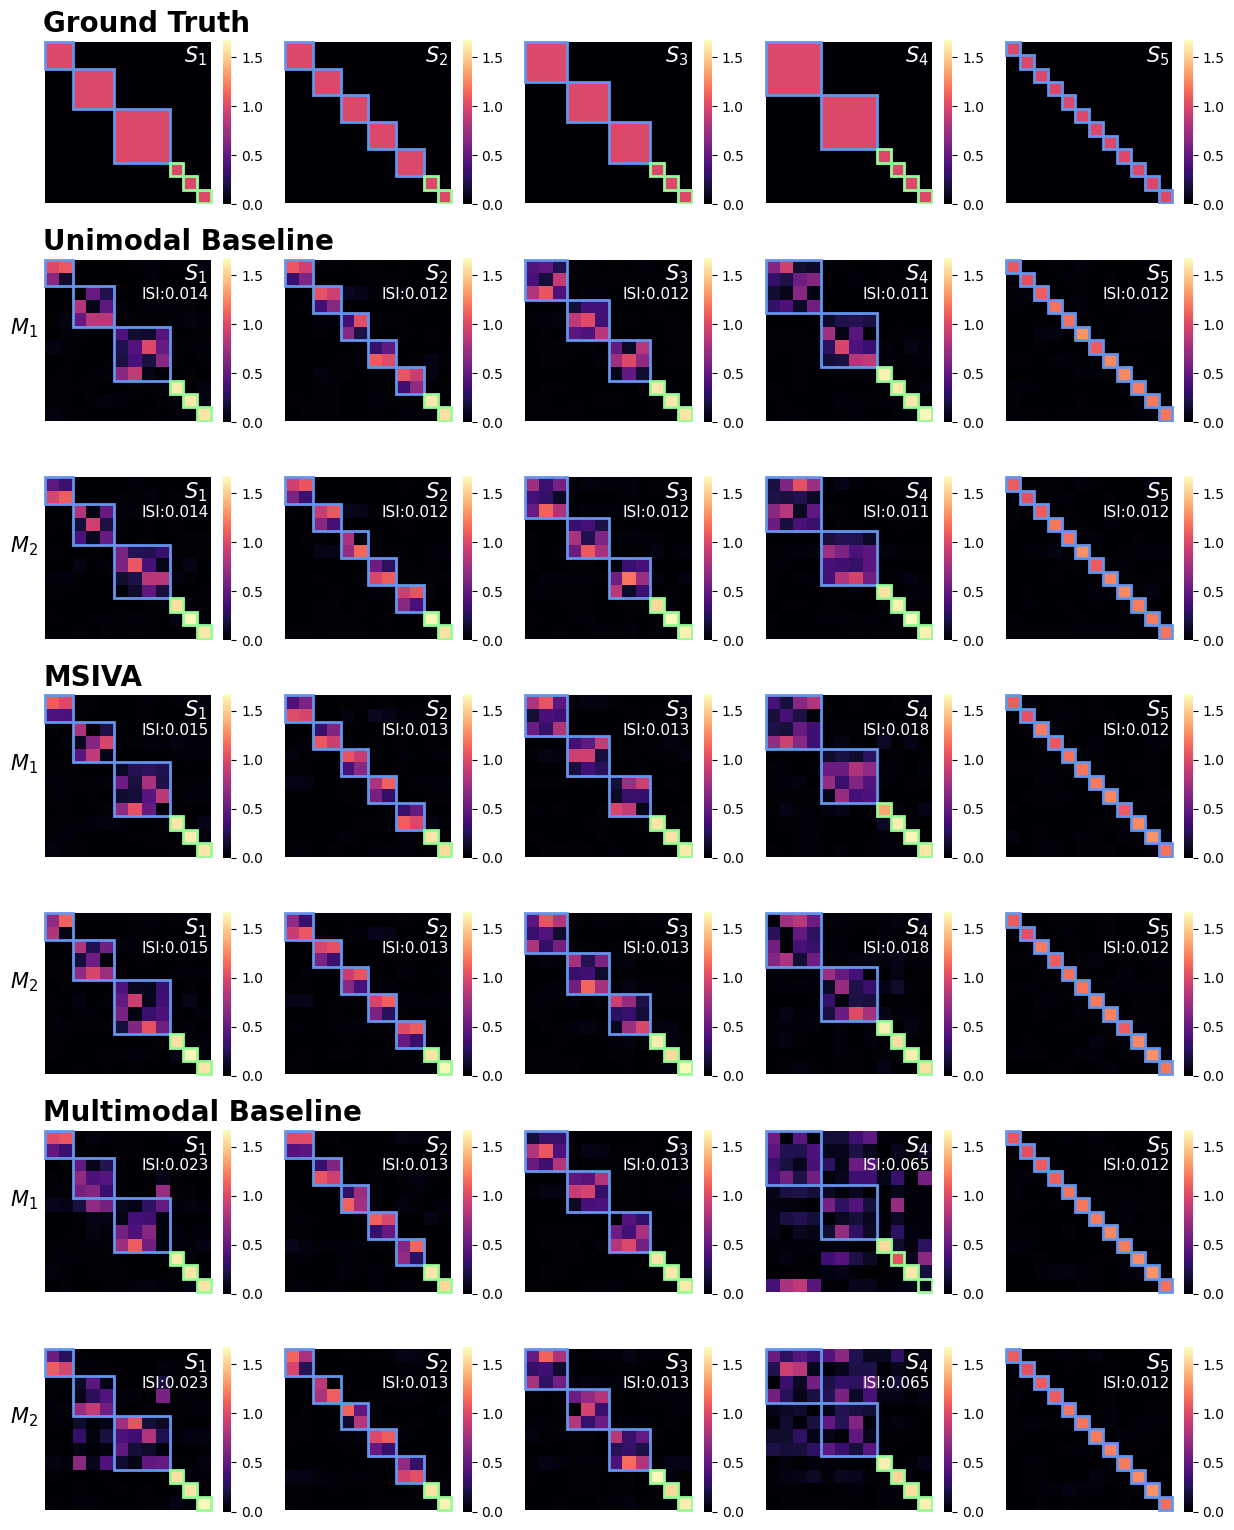

In [12]:
corrabsmax = np.max(np.abs(corr))

fig, axes = plt.subplots(7, num_subspace_struct, figsize=(2.5*num_subspace_struct,2.2*7))

for i in range(num_subspace_struct):
    ax = axes[0,i]
    sns.heatmap(s_list[i],cmap="magma",vmin=0,vmax=corrabsmax,ax=ax)
    ax.text(10.9, 1.1, f"$S_{i+1}$", fontsize=15, color="white", ha="center", va="center")
    ax.set_xticks([])
    ax.set_yticks([])
    if i == 0:
        ax.set_title("Ground Truth", loc="left", fontsize=20, fontweight="bold")
    plot_sq(ax, i)
    ax.set_xlim(-0.1, 12.1)
    ax.set_ylim(12.1, -0.1)

    for j in range(1,7):
        ax = axes[j,i]
        abscorr = np.abs(corr_sorted[i,j-1])
        sns.heatmap(abscorr,cmap="magma",vmin=0,vmax=corrabsmax,ax=ax)
        ax.text(10.9, 1.1, f"$S_{i+1}$", fontsize=15, color="white", ha="center", va="center")
        ax.text(9.4, 2.6, f"ISI:{isi_list[(j-1)//2][i,i]:.3f}", fontsize=11, color="white", ha="center", va="center")
        if i == 0:
            ax.set_ylabel(f"$M_{(j-1)%2+1}$", fontsize=15, rotation=0, labelpad=14)
        ax.set_xticks([])
        ax.set_yticks([])
        if i == 0 and j == 1:
            ax.set_title("Unimodal Baseline", loc="left", fontsize=20, fontweight="bold")
        if i == 0 and j == 3:
            ax.set_title("MSIVA", loc="left", fontsize=20, fontweight="bold")
        if i == 0 and j == 5:
            ax.set_title("Multimodal Baseline", loc="left", fontsize=20, fontweight="bold")
        plot_sq(ax, i)
        ax.set_xlim(-0.1, 12.1)
        ax.set_ylim(12.1, -0.1)

plt.tight_layout()
plt.savefig("simulation_absWA.pdf")